In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
# load dữ liệu, chuyển về dạng numpy
data = pd.read_csv('data_linear.csv')

In [3]:
# chuyển dữ liệu về dạng torch
x = torch.tensor(data['Diện tích'])
y = torch.tensor(data['Giá'])

In [4]:
def model(x, a, b):
    return a * x + b

In [5]:
def loss_fn(y_hat,y):
    squared_diffs = (y_hat - y)**2
    return squared_diffs.mean()


In [6]:
# Hàm training
def training_loop(n_epochs, learning_rate, params, x, y):
    a, b = params
    # Lưu loss qua epoch để vẽ đồ thị loss
    losses = []
    for epoch in range(1, n_epochs + 1):
        # nếu có grad ở tham số a, b thì zero đi, tránh trường hợp cộng dồn grad
        if a.grad is not None:
            a.grad.zero_()
        if b.grad is not None:
            b.grad.zero_()
        
        # xây model, loss
        y_hat = model(x, a, b)
        loss = loss_fn(y_hat, y)
        
        # gọi backward để tính đạo hàm ngược của loss với tham số a, b
        loss.backward()

        # update a,b bằng thuật toán gradient descent, để torch.no_grad thì mình không cần backward ở bước này
        with torch.no_grad():
            a -= learning_rate * a.grad
            b -= learning_rate * b.grad
        
        if epoch % 1 == 0:
            losses.append(loss.item())
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return a, b, losses

In [7]:
a = torch.ones((),requires_grad=True)
b = torch.zeros((),requires_grad=True)

a, b, losses = training_loop(30, 0.00005, (a, b), x, y)

Epoch 1, Loss 928658.176303
Epoch 2, Loss 264754.354670
Epoch 3, Loss 75608.348718
Epoch 4, Loss 21720.675909
Epoch 5, Loss 6368.099589
Epoch 6, Loss 1994.160233
Epoch 7, Loss 748.023193
Epoch 8, Loss 392.999771
Epoch 9, Loss 291.853276
Epoch 10, Loss 263.036789
Epoch 11, Loss 254.826636
Epoch 12, Loss 252.487520
Epoch 13, Loss 251.821067
Epoch 14, Loss 251.631127
Epoch 15, Loss 251.576954
Epoch 16, Loss 251.561457
Epoch 17, Loss 251.556977
Epoch 18, Loss 251.555637
Epoch 19, Loss 251.555189
Epoch 20, Loss 251.554995
Epoch 21, Loss 251.554874
Epoch 22, Loss 251.554774
Epoch 23, Loss 251.554679
Epoch 24, Loss 251.554586
Epoch 25, Loss 251.554493
Epoch 26, Loss 251.554401
Epoch 27, Loss 251.554308
Epoch 28, Loss 251.554216
Epoch 29, Loss 251.554124
Epoch 30, Loss 251.554031


Text(0, 0.5, 'loss')

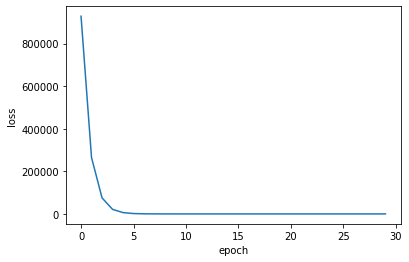

In [8]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [9]:
# Dự đoán giá trị mới, x = 50
x = torch.tensor(50)
with torch.no_grad():
    y_hat = model(x, a, b)
    print(y_hat)

tensor(755.6882)


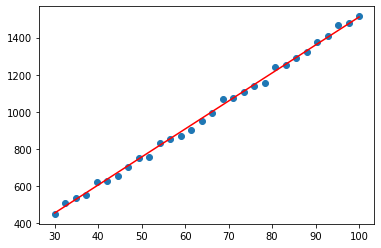

In [10]:
x = torch.tensor(data['Diện tích'])
y = torch.tensor(data['Giá'])
with torch.no_grad():
    y_hat = model(x, a, b)
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')

## Mạng nn đơn giản nhất

In [11]:
import torch
from torch import nn
from torch.nn import functional as F
import pandas as pd
from torchviz import make_dot
import matplotlib.pyplot as plt
import torch.optim as optim

In [12]:
data = pd.read_csv('data_linear.csv').values
# chuyển dữ liệu về dạng torch
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)
y = y.unsqueeze(1)

In [13]:
linear_model = nn.Linear(1, 1)
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [14]:
linear_model = nn.Linear(1, 1)
linear_model

list(linear_model.parameters())

loss_fn=nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.0001)

n_epoch = 10
model = linear_model
losses = []
for epoch in range(1,n_epoch +1):
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f'EPOCH {epoch}: Loss: {loss}')
    

EPOCH 1: Loss: 986247.75
EPOCH 2: Loss: 4746.3759765625
EPOCH 3: Loss: 271.7601318359375
EPOCH 4: Loss: 251.3611297607422
EPOCH 5: Loss: 251.26791381835938
EPOCH 6: Loss: 251.2669219970703
EPOCH 7: Loss: 251.26683044433594
EPOCH 8: Loss: 251.26687622070312
EPOCH 9: Loss: 251.2666473388672
EPOCH 10: Loss: 251.26651000976562


Text(0, 0.5, 'loss')

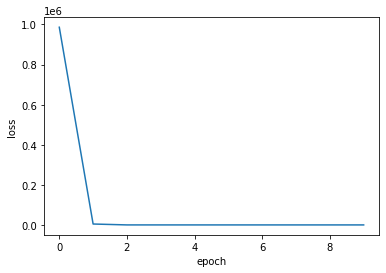

In [15]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')



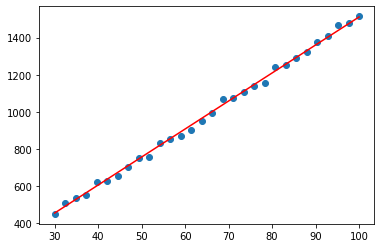

In [16]:
with torch.no_grad():
    y_hat = model(x)
plt.scatter(x, y)
plt.plot(x, y_hat, c = 'r')